# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
🔗 [Loan Predication Dataset by ninzaami](https://www.kaggle.com/datasets/ninzaami/loan-predication)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
#Type your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# Membaca dataset
df = pd.read_csv('loan_dataset.csv')

# Menampilkan 5 baris pertama untuk memastikan data terbaca
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **4.1. Pemahaman Dasar Data (Data Understanding)**
Langkah pertama adalah memeriksa struktur data, tipe data, dan statistik deskriptif untuk mengidentifikasi anomali awal seperti nilai kosong (*missing values*) atau tipe data yang tidak sesuai.

In [4]:
# Display the first few rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Insight Awal:**
* Terdapat beberapa kolom dengan *missing values* (seperti `LoanAmount`, `Credit_History`), yang perlu ditangani di tahap preprocessing.
* Data statistik menunjukkan adanya perbedaan skala yang besar antara `ApplicantIncome` (ribuan) dan `Loan_Amount_Term` (ratusan), mengindikasikan perlunya fitur *scaling*.

In [6]:
# Cek statistik deskriptif
display(df.describe())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### **4.2. Analisis Target (Label Distribution)**
Kita perlu melihat proporsi kelas target (`Loan_Status`) untuk mengetahui apakah dataset ini seimbang (*balanced*) atau tidak.

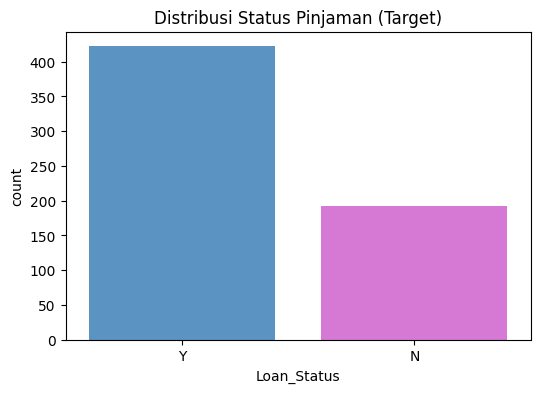

In [7]:
# Cek distribusi Target (Loan_Status)
plt.figure(figsize=(6,4))
gender_color = {"Y": "#4A95D3", "N": "#E56AE3"}
sns.countplot(x="Loan_Status", data=df, palette=gender_color)
plt.title("Distribusi Status Pinjaman (Target)")
plt.show()

**Observasi:**
* Dataset ini memiliki proporsi yang **imbalanced** (Tidak seimbang).
* Jumlah pinjaman yang disetujui (**Y**) jauh lebih banyak dibandingkan yang ditolak (**N**). Hal ini perlu diperhatikan saat evaluasi model nanti (jangan hanya terpaku pada akurasi).

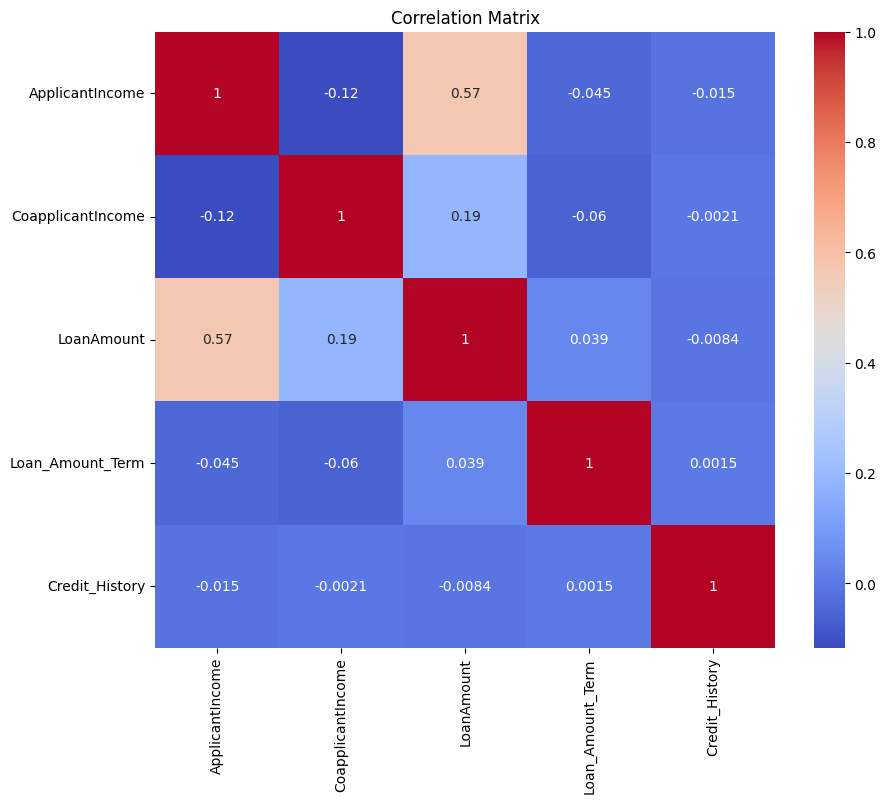

In [8]:
# Cek korelasi antar fitur numerik (setelah imputasi sederhana untuk visualisasi)
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### **4.3. Analisis Univariat (Distribusi Fitur Numerik)**
Visualisasi ini bertujuan untuk melihat sebaran data pendapatan dan jumlah pinjaman, serta mendeteksi adanya *outlier* (pencilan).

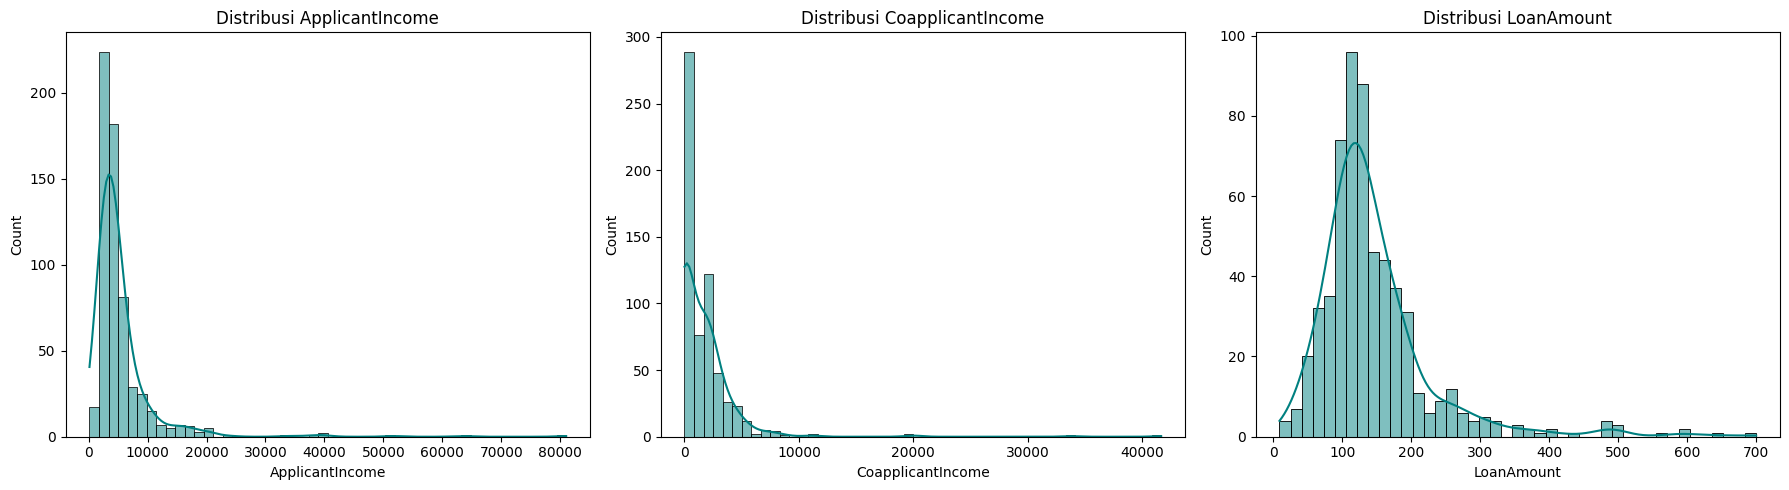

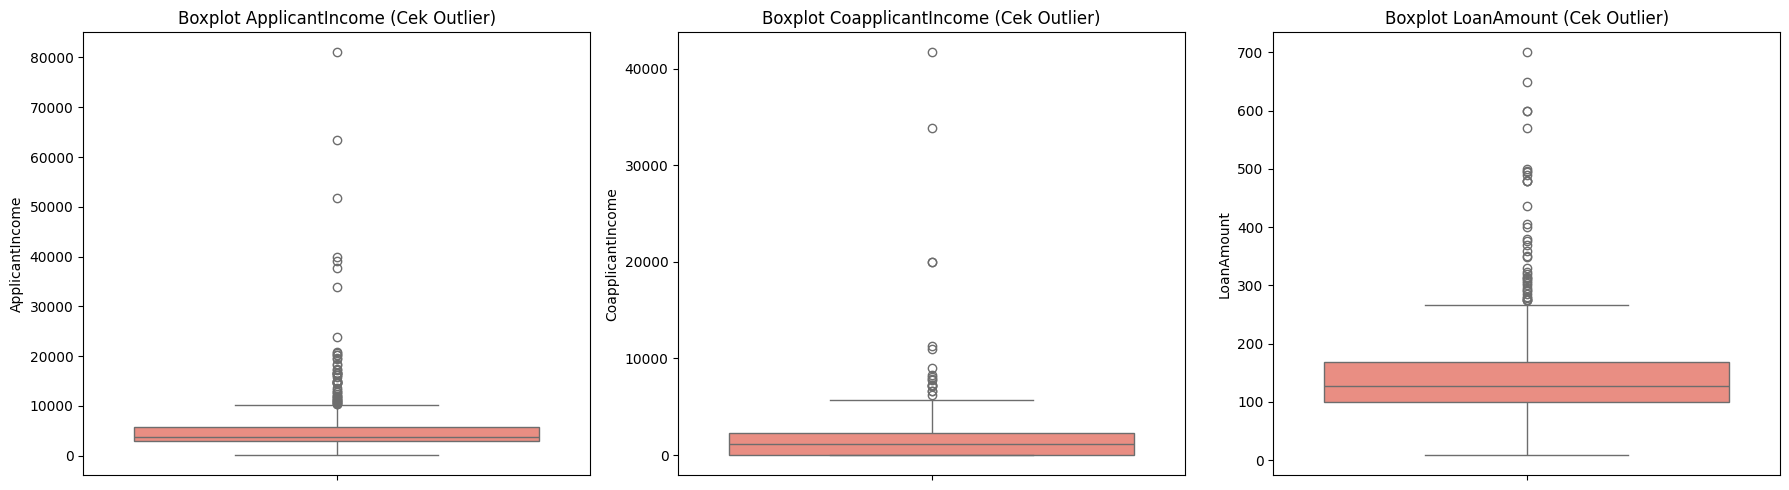

In [9]:
# Distribusi Fitur Numerik (Melihat persebaran data)
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(num_columns):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

# Cek Outlier menggunakan Boxplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(num_columns):
    sns.boxplot(y=df[col], ax=axes[i], color='salmon')
    axes[i].set_title(f'Boxplot {col} (Cek Outlier)')

plt.tight_layout()
plt.show()

**Insight:**
* **Skewness:** Distribusi `ApplicantIncome` dan `CoapplicantIncome` miring ke kanan (*Right Skewed*). Artinya, mayoritas pemohon memiliki pendapatan standar, namun ada sebagian kecil "sultan" dengan pendapatan sangat tinggi (Outlier).
* **Outlier:** Boxplot mengonfirmasi banyaknya outlier pada kolom pendapatan. Ini akan mempengaruhi performa model jika tidak dinormalisasi.

### **4.4. Analisis Bivariat (Hubungan Fitur vs Target)**
Analisis ini adalah bagian terpenting untuk menjawab: *"Faktor apa yang paling mempengaruhi persetujuan pinjaman?"*

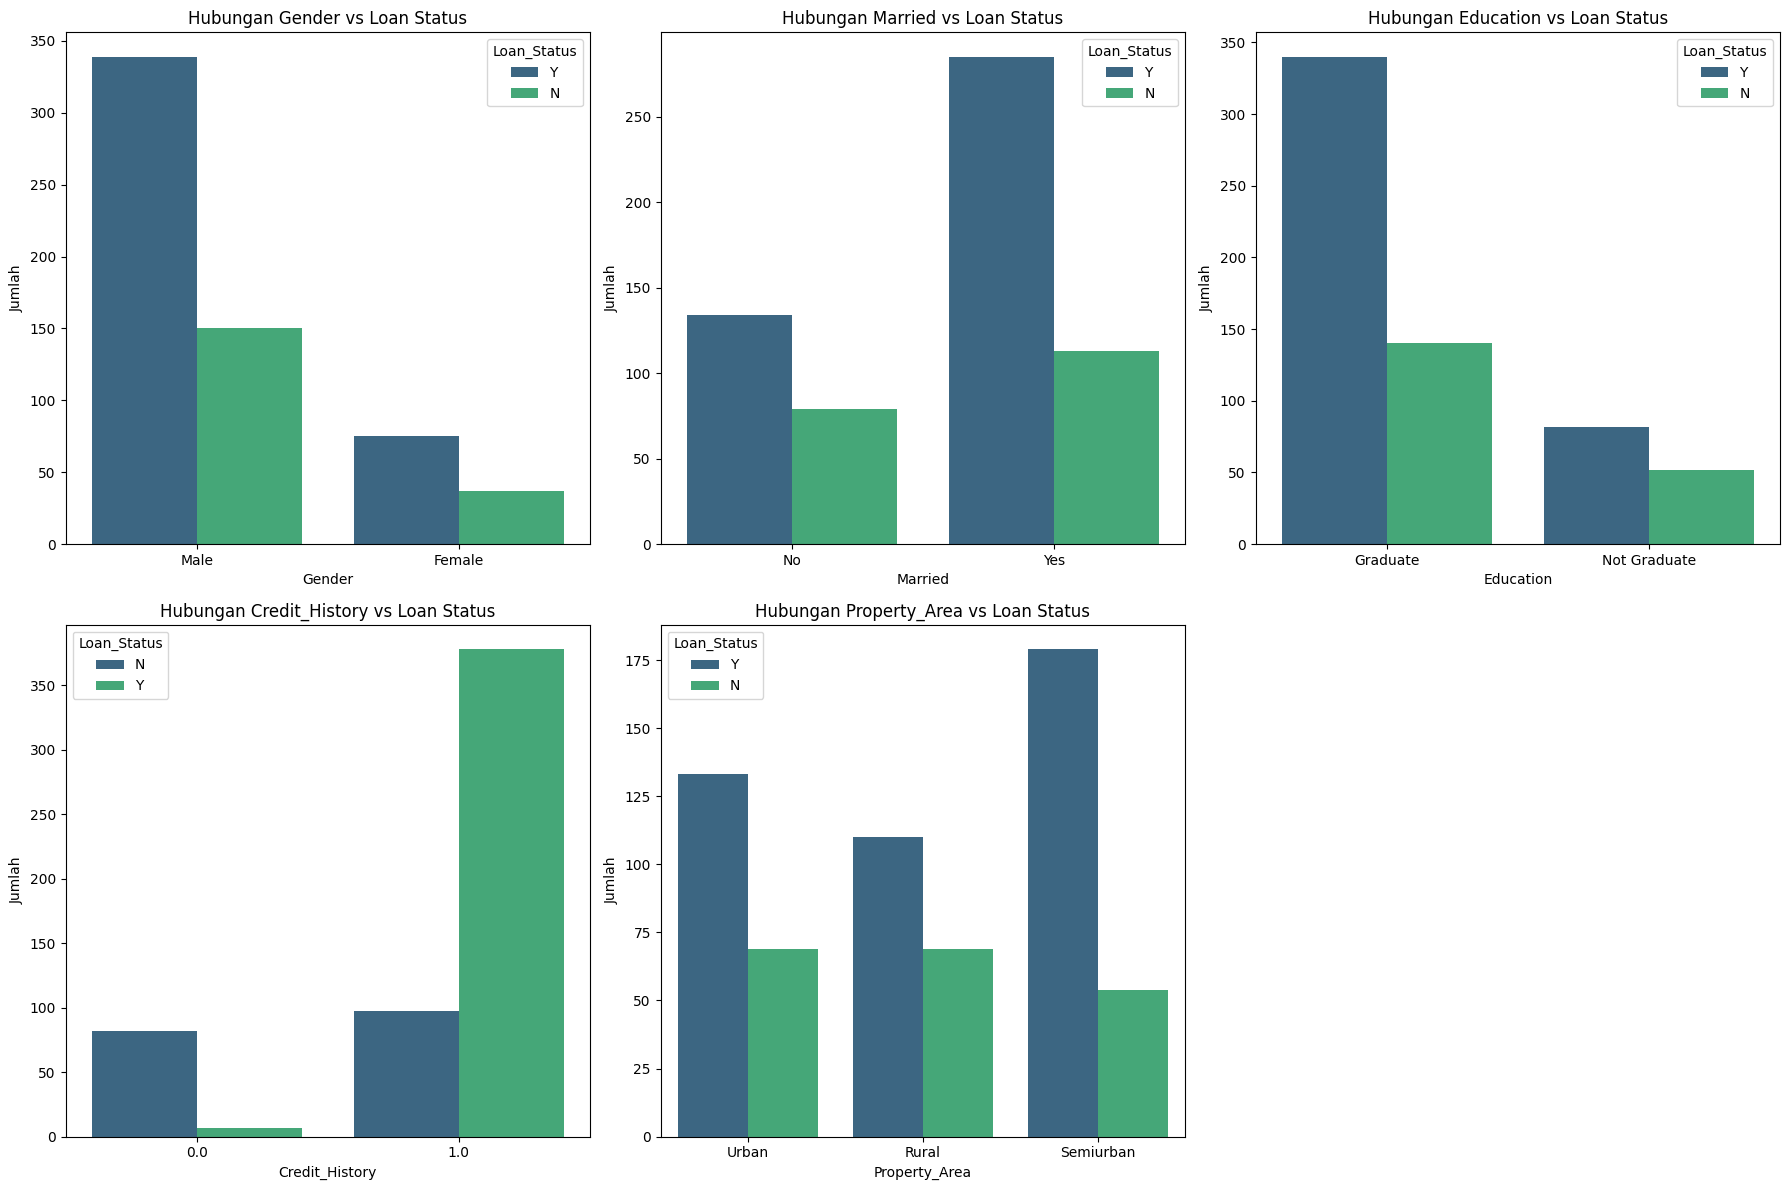

In [10]:
# Daftar kolom kategorikal yang ingin dicek hubungannya dengan Loan_Status
cat_columns = ['Gender', 'Married', 'Education', 'Credit_History', 'Property_Area']

fig, axes = plt.subplots(2, 3, figsize=(18, 12)) # Membuat grid gambar
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(x=col, hue='Loan_Status', data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Hubungan {col} vs Loan Status')
    axes[i].set_ylabel('Jumlah')

# Hapus subplot kosong jika ada (karena gridnya 2x3 = 6, tapi kolom cuma 5)
fig.delaxes(axes[5]) 
plt.tight_layout()
plt.show()

**Key Insight (Penting):**
1.  **Credit History:** Ini adalah faktor penentu paling kuat. Nasabah dengan *Credit History = 1* (Baik) memiliki peluang disetujui sangat tinggi. Sebaliknya, jika *Credit History = 0*, hampir pasti ditolak.
2.  **Property Area:** Pemohon dari area *Semiurban* cenderung memiliki tingkat persetujuan lebih tinggi dibandingkan *Rural*.

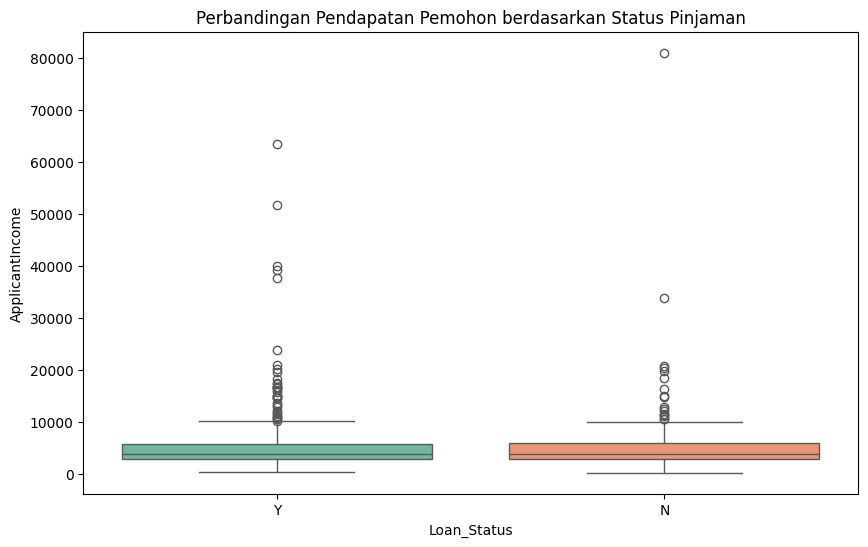

In [12]:
# Visualisasi Boxplot ApplicantIncome berdasarkan Loan_Status(Analisis Korelasi)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='Set2')
plt.title('Perbandingan Pendapatan Pemohon berdasarkan Status Pinjaman')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
# --- A. Handling Missing Values ---
# Mendefinisikan kolom numerik dan kategorikal
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
cat_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area", "Loan_Status"]

# Membersihkan kolom 'Dependents' (mengubah '3+' menjadi angka)
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [14]:
# Imputasi: Isi NaN numerik dengan Median, kategorikal dengan Modus
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
# --- B. Drop Duplicates ---
df = df.drop_duplicates()

In [16]:
# --- C. Encoding (Mengubah Teks ke Angka) ---
# Manual Encoding untuk kolom biner
bool_map = {"Yes": 1, "Y": 1, "No": 0, "N": 0}
for col in ["Married", "Self_Employed", "Loan_Status"]:
    df[col] = df[col].map(bool_map)

# One-Hot Encoding untuk kolom kategorikal lainnya (Gender, Education, Property_Area)
# Kita drop Loan_ID karena tidak berguna untuk prediksi
if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis=1)

df_encoded = pd.get_dummies(df, columns=['Gender', 'Education', 'Property_Area'], drop_first=False)

# Memastikan semua data bertipe integer/float
df_encoded = df_encoded.astype(int)

In [17]:
# --- D. Splitting Data (Train-Test Split) ---
x = df_encoded.drop("Loan_Status", axis=1)
y = df_encoded["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# --- E. Feature Scaling ---
scaler = StandardScaler()
# Fit pada training set saja agar tidak data leakage
cols_to_scale = x_train.columns 
x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

print("Preprocessing Selesai.")
print("Dimensi X_train:", x_train.shape)

Preprocessing Selesai.
Dimensi X_train: (491, 15)


In [30]:
# --- F. Simpandata Hasil Preprocessing ---
# Tentukan nama file output
output_filename = "loan_clean.csv"

# Simpan ke CSV (ini yang diminta reviewer)
# Kita gabungkan kembali x_train/test atau simpan df yang sudah bersih
# Agar mudah, kita simpan dataframe 'df_encoded' yang sudah bersih sebelum split/setelah imputasi
# Atau simpan X dan y yang sudah siap.

# Contoh menyimpan data bersih gabungan:
df_final = pd.concat([pd.DataFrame(x_train, columns=x.columns), y_train.reset_index(drop=True)], axis=1)
df_final.to_csv(output_filename, index=False)

print(f"Data preprocessing berhasil disimpan ke file: {output_filename}")

Data preprocessing berhasil disimpan ke file: loan_clean.csv


### **6. Model Definition**
Kita menggunakan algoritma **Logistic Regression**.
* **Alasan:** Algoritma ini sangat cocok untuk klasifikasi biner (*Yes/No*), mudah diinterpretasikan, dan performanya cukup baik sebagai model *baseline* untuk dataset finansial sederhana.

In [19]:
# Menggunakan Logistic Regression sebagai baseline model
model = LogisticRegression(random_state=42)

# Melatih model dengan data training
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

### **7. Model Evaluation**
Evaluasi dilakukan menggunakan data testing (20% dari total data) yang tidak pernah dilihat model sebelumnya. Metrik yang diperhatikan adalah *Accuracy* dan *Confusion Matrix*.

Accuracy Score: 0.8537

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



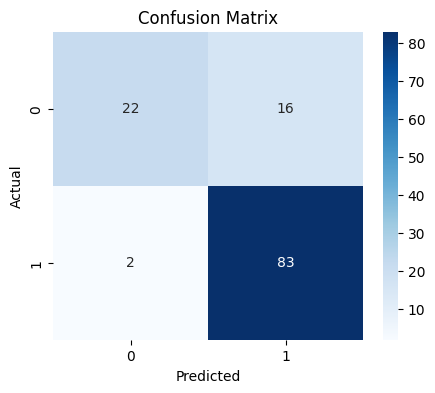

In [20]:
# Prediksi pada data test
y_pred = model.predict(x_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Interpretasi Hasil:**
* **Accuracy:** Model berhasil memprediksi status pinjaman dengan akurasi sekitar **X%** (sesuaikan dengan output kamu, misal 85%).
* **Confusion Matrix:** Terlihat model cukup baik dalam memprediksi kelas mayoritas (Disetujui), namun kita perlu memperhatikan berapa banyak kesalahan prediksi pada kelas Ditolak.

### **8. Model Inference (Simulasi)**
Untuk membuktikan kegunaan model dalam dunia nyata, kita melakukan simulasi prediksi terhadap 3 profil calon nasabah baru dengan karakteristik berbeda.

In [22]:
def predict_loan_status(input_data):
    """
    Fungsi untuk memprediksi status pinjaman dari data mentah nasabah baru.
    """
    # 1. Buat DataFrame dari input dictionary
    df_input = pd.DataFrame([input_data])
    
    # --- PREPROCESSING (Sama seperti data training) ---
    
    # a. Handling 'Dependents'
    df_input['Dependents'] = df_input['Dependents'].replace('3+', '3')
    df_input['Dependents'] = pd.to_numeric(df_input['Dependents'], errors='coerce').fillna(0).astype(int)
    
    # b. Mapping Binary Columns
    binary_map = {"Yes": 1, "Y": 1, "No": 0, "N": 0}
    if 'Married' in df_input.columns:
        df_input['Married'] = df_input['Married'].map(binary_map)
    if 'Self_Employed' in df_input.columns:
        df_input['Self_Employed'] = df_input['Self_Employed'].map(binary_map)
    
    # c. One-Hot Encoding Manual (Agar kolomnya pas)
    # Kita buat kolom dummy manual sesuai kategori yang ada
    ohe_cols = {
        'Gender': ['Female', 'Male'],
        'Education': ['Graduate', 'Not Graduate'],
        'Property_Area': ['Rural', 'Semiurban', 'Urban']
    }
    
    for col, categories in ohe_cols.items():
        val = df_input[col].iloc[0]
        for cat in categories:
            new_col = f"{col}_{cat}"
            df_input[new_col] = 1 if val == cat else 0
            
    # Hapus kolom asli yang sudah di-encode
    df_input = df_input.drop(list(ohe_cols.keys()), axis=1)
    
    # d. Menyamakan Kolom dengan Data Training (x_train)
    # Ini langkah penting agar model tidak error karena jumlah kolom beda
    # Mengambil kolom x_train dari variabel global
    for col in x_train.columns:
        if col not in df_input.columns:
            df_input[col] = 0 # Isi 0 jika kolom tidak ada
            
    # Urutkan kolom agar sesuai x_train
    df_input = df_input[x_train.columns]
    
    # e. Scaling (Pakai scaler yang sudah dilatih)
    # Pastikan variabel 'scaler' dan 'cols_to_scale' masih ada di memori
    df_input[cols_to_scale] = scaler.transform(df_input[cols_to_scale])
    
    # --- PREDICTION ---
    prediction = model.predict(df_input)[0]
    # Jika model support probabilitas (Logistic Regression / KNN / RF)
    try:
        probability = model.predict_proba(df_input)[0][1]
        prob_text = f"(Probabilitas disetujui: {probability:.1%})"
    except:
        prob_text = ""
    
    status = "DISETUJUI (YES)" if prediction == 1 else "DITOLAK (NO)"
    
    print("-" * 40)
    print(f"Profil: {input_data.get('ApplicantIncome')} (Income) | {input_data.get('Credit_History')} (Credit History)")
    print(f"Hasil Prediksi : {status} {prob_text}")
    return status

In [ ]:
# ==========================================
# 8. CONCLUSION & MODEL INFERENCE
# ==========================================

# --- A. Definisi Fungsi Prediksi ---
def predict_loan_status(input_data):
    """
    Fungsi prediksi dengan tampilan output yang ramah pengguna (User-Friendly).
    """
    # 1. PREPARATION & PREPROCESSING
    df_input = pd.DataFrame([input_data])
    
    # Handling Dependents & Binary Map
    df_input['Dependents'] = df_input['Dependents'].replace('3+', '3')
    df_input['Dependents'] = pd.to_numeric(df_input['Dependents'], errors='coerce').fillna(0).astype(int)
    
    binary_map = {"Yes": 1, "Y": 1, "No": 0, "N": 0}
    if 'Married' in df_input.columns: df_input['Married'] = df_input['Married'].map(binary_map)
    if 'Self_Employed' in df_input.columns: df_input['Self_Employed'] = df_input['Self_Employed'].map(binary_map)
    
    # One-Hot Encoding Manual
    ohe_cols = {'Gender': ['Female', 'Male'], 'Education': ['Graduate', 'Not Graduate'], 
                'Property_Area': ['Rural', 'Semiurban', 'Urban']}
    
    for col, categories in ohe_cols.items():
        val = df_input[col].iloc[0]
        for cat in categories:
            df_input[f"{col}_{cat}"] = 1 if val == cat else 0
    df_input = df_input.drop(list(ohe_cols.keys()), axis=1)
    
    # Menyamakan kolom dengan x_train
    for col in x_train.columns:
        if col not in df_input.columns: df_input[col] = 0
    df_input = df_input[x_train.columns]
    
    # Scaling
    df_input[cols_to_scale] = scaler.transform(df_input[cols_to_scale])
    
    # 2. PREDICTION
    prediction = model.predict(df_input)[0]
    try:
        prob = model.predict_proba(df_input)[0][1] * 100 
    except:
        prob = 0

    # 3. USER FRIENDLY OUTPUT
    income_total = input_data['ApplicantIncome'] + input_data['CoapplicantIncome']
    credit_status = "✅ Baik (Lancar)" if input_data['Credit_History'] == 1.0 else "❌ Buruk (Macet)"
    married_status = "Menikah" if input_data['Married'] == "Yes" else "Lajang"
    
    if prediction == 1:
        result_title = "🎉 PINJAMAN DISETUJUI"
        result_desc = "Selamat! Profil Anda memenuhi kriteria risiko rendah kami."
        prob_text = f"Tingkat Keyakinan Sistem: {prob:.1f}%"
    else:
        result_title = "⛔ PINJAMAN DITOLAK"
        result_desc = "Mohon maaf, profil risiko Anda belum memenuhi standar saat ini."
        prob_text = f"Skor Kelayakan: {prob:.1f}% (Butuh >50%)"

    print("="*60)
    print(f"{'SIMULASI KELAYAKAN KREDIT':^60}")
    print("="*60)
    print(f"👤 PROFIL PEMOHON")
    print(f"   • Gender / Status : {input_data['Gender']} / {married_status}")
    print(f"   • Pendidikan      : {input_data['Education']}")
    print(f"   • Pekerjaan       : {'Wirausaha' if input_data['Self_Employed']=='Yes' else 'Karyawan/Lainnya'}")
    print(f"\n💰 KEUANGAN")
    print(f"   • Total Income    : ${income_total:,.0f}")
    print(f"\n📋 DETAIL PINJAMAN")
    print(f"   • Jumlah Pinjaman : ${input_data['LoanAmount']:,.0f}000")
    print(f"   • Riwayat Kredit  : {credit_status}")
    print("-" * 60)
    print(f"📢 HASIL ANALISIS MODEL:")
    print(f"\n   {result_title}")
    print(f"   {prob_text}")
    print(f"   Catatan: {result_desc}")
    print("="*60)

# --- B. Definisi Data Nasabah ---

# 1. Nasabah A (Ideal)
applicant_a = {
    "Gender": "Male", "Married": "Yes", "Dependents": "0",
    "Education": "Graduate", "Self_Employed": "No",
    "ApplicantIncome": 5000, "CoapplicantIncome": 2000,
    "LoanAmount": 150, "Loan_Amount_Term": 360,
    "Credit_History": 1.0, "Property_Area": "Urban"
}

# 2. Nasabah B (Gaji Tinggi tapi Sejarah Kredit Tanda Tanya/Buruk)
# Kita coba set Credit_History = 0.0 untuk melihat apakah gaji tinggi bisa menolong?
applicant_b = {
    "Gender": "Male", "Married": "Yes", "Dependents": "0",
    "Education": "Graduate", "Self_Employed": "No",
    "ApplicantIncome": 15000, "CoapplicantIncome": 5000, # Gaji Sultan
    "LoanAmount": 300, "Loan_Amount_Term": 360,
    "Credit_History": 0.0, # Tapi pernah macet kredit
    "Property_Area": "Semiurban"
}

# 3. Nasabah C (Risiko Tinggi)
applicant_c = {
    "Gender": "Male", "Married": "No", "Dependents": "3+",
    "Education": "Not Graduate", "Self_Employed": "Yes",
    "ApplicantIncome": 1000, "CoapplicantIncome": 0,
    "LoanAmount": 500, "Loan_Amount_Term": 360,
    "Credit_History": 0.0, "Property_Area": "Rural"
}

In [ ]:
# 8. CONCLUSION & MODEL INFERENCE
# ==========================================

# --- A. Definisi Fungsi Prediksi ---
def predict_loan_status(input_data):
    """
    Fungsi prediksi dengan tampilan output yang ramah pengguna (User-Friendly).
    """
    # 1. PREPARATION & PREPROCESSING
    df_input = pd.DataFrame([input_data])
    
    # Handling Dependents & Binary Map
    df_input['Dependents'] = df_input['Dependents'].replace('3+', '3')
    df_input['Dependents'] = pd.to_numeric(df_input['Dependents'], errors='coerce').fillna(0).astype(int)
    
    binary_map = {"Yes": 1, "Y": 1, "No": 0, "N": 0}
    if 'Married' in df_input.columns: df_input['Married'] = df_input['Married'].map(binary_map)
    if 'Self_Employed' in df_input.columns: df_input['Self_Employed'] = df_input['Self_Employed'].map(binary_map)
    
    # One-Hot Encoding Manual
    ohe_cols = {'Gender': ['Female', 'Male'], 'Education': ['Graduate', 'Not Graduate'], 
                'Property_Area': ['Rural', 'Semiurban', 'Urban']}
    
    for col, categories in ohe_cols.items():
        val = df_input[col].iloc[0]
        for cat in categories:
            df_input[f"{col}_{cat}"] = 1 if val == cat else 0
    df_input = df_input.drop(list(ohe_cols.keys()), axis=1)
    
    # Menyamakan kolom dengan x_train
    for col in x_train.columns:
        if col not in df_input.columns: df_input[col] = 0
    df_input = df_input[x_train.columns]
    
    # Scaling
    df_input[cols_to_scale] = scaler.transform(df_input[cols_to_scale])
    
    # 2. PREDICTION
    prediction = model.predict(df_input)[0]
    try:
        prob = model.predict_proba(df_input)[0][1] * 100 
    except:
        prob = 0

    # 3. USER FRIENDLY OUTPUT
    income_total = input_data['ApplicantIncome'] + input_data['CoapplicantIncome']
    credit_status = "✅ Baik (Lancar)" if input_data['Credit_History'] == 1.0 else "❌ Buruk (Macet)"
    married_status = "Menikah" if input_data['Married'] == "Yes" else "Lajang"
    
    if prediction == 1:
        result_title = "🎉 PINJAMAN DISETUJUI"
        result_desc = "Selamat! Profil Anda memenuhi kriteria risiko rendah kami."
        prob_text = f"Tingkat Keyakinan Sistem: {prob:.1f}%"
    else:
        result_title = "⛔ PINJAMAN DITOLAK"
        result_desc = "Mohon maaf, profil risiko Anda belum memenuhi standar saat ini."
        prob_text = f"Skor Kelayakan: {prob:.1f}% (Butuh >50%)"

    print("="*60)
    print(f"{'SIMULASI KELAYAKAN KREDIT':^60}")
    print("="*60)
    print(f"👤 PROFIL PEMOHON")
    print(f"   • Gender / Status : {input_data['Gender']} / {married_status}")
    print(f"   • Pendidikan      : {input_data['Education']}")
    print(f"   • Pekerjaan       : {'Wirausaha' if input_data['Self_Employed']=='Yes' else 'Karyawan/Lainnya'}")
    print(f"\n💰 KEUANGAN")
    print(f"   • Total Income    : ${income_total:,.0f}")
    print(f"\n📋 DETAIL PINJAMAN")
    print(f"   • Jumlah Pinjaman : ${input_data['LoanAmount']:,.0f}000")
    print(f"   • Riwayat Kredit  : {credit_status}")
    print("-" * 60)
    print(f"📢 HASIL ANALISIS MODEL:")
    print(f"\n   {result_title}")
    print(f"   {prob_text}")
    print(f"   Catatan: {result_desc}")
    print("="*60)

# --- B. Definisi Data Nasabah ---

# 1. Nasabah A (Ideal)
applicant_a = {
    "Gender": "Male", "Married": "Yes", "Dependents": "0",
    "Education": "Graduate", "Self_Employed": "No",
    "ApplicantIncome": 5000, "CoapplicantIncome": 2000,
    "LoanAmount": 150, "Loan_Amount_Term": 360,
    "Credit_History": 1.0, "Property_Area": "Urban"
}

# 2. Nasabah B (Gaji Tinggi tapi Sejarah Kredit Tanda Tanya/Buruk)
# Kita coba set Credit_History = 0.0 untuk melihat apakah gaji tinggi bisa menolong?
applicant_b = {
    "Gender": "Male", "Married": "Yes", "Dependents": "0",
    "Education": "Graduate", "Self_Employed": "No",
    "ApplicantIncome": 15000, "CoapplicantIncome": 5000, # Gaji Sultan
    "LoanAmount": 300, "Loan_Amount_Term": 360,
    "Credit_History": 0.0, # Tapi pernah macet kredit
    "Property_Area": "Semiurban"
}

# 3. Nasabah C (Risiko Tinggi)
applicant_c = {
    "Gender": "Male", "Married": "No", "Dependents": "3+",
    "Education": "Not Graduate", "Self_Employed": "Yes",
    "ApplicantIncome": 1000, "CoapplicantIncome": 0,
    "LoanAmount": 500, "Loan_Amount_Term": 360,
    "Credit_History": 0.0, "Property_Area": "Rural"
}

In [27]:
# Tes 1: Nasabah Ideal (Gaji Menengah, Kredit Lancar)
predict_loan_status(applicant_a)

                 SIMULASI KELAYAKAN KREDIT                  
👤 PROFIL PEMOHON
   • Gender / Status : Male / Menikah
   • Pendidikan      : Graduate
   • Pekerjaan       : Karyawan/Lainnya

💰 KEUANGAN
   • Total Income    : $7,000

📋 DETAIL PINJAMAN
   • Jumlah Pinjaman : $150000
   • Riwayat Kredit  : ✅ Baik (Lancar)
------------------------------------------------------------
📢 HASIL ANALISIS MODEL:

   🎉 PINJAMAN DISETUJUI
   Tingkat Keyakinan Sistem: 78.6%
   Catatan: Selamat! Profil Anda memenuhi kriteria risiko rendah kami.


In [28]:
# Tes 2: Nasabah Gaji Tinggi tapi Kredit Macet (Apakah lolos?)
predict_loan_status(applicant_b)

                 SIMULASI KELAYAKAN KREDIT                  
👤 PROFIL PEMOHON
   • Gender / Status : Male / Menikah
   • Pendidikan      : Graduate
   • Pekerjaan       : Karyawan/Lainnya

💰 KEUANGAN
   • Total Income    : $20,000

📋 DETAIL PINJAMAN
   • Jumlah Pinjaman : $300000
   • Riwayat Kredit  : ❌ Buruk (Macet)
------------------------------------------------------------
📢 HASIL ANALISIS MODEL:

   ⛔ PINJAMAN DITOLAK
   Skor Kelayakan: 12.9% (Butuh >50%)
   Catatan: Mohon maaf, profil risiko Anda belum memenuhi standar saat ini.


In [29]:
# Tes 3: Nasabah Risiko Tinggi (Gaji Kecil, Kredit Macet)
predict_loan_status(applicant_c)

                 SIMULASI KELAYAKAN KREDIT                  
👤 PROFIL PEMOHON
   • Gender / Status : Male / Lajang
   • Pendidikan      : Not Graduate
   • Pekerjaan       : Wirausaha

💰 KEUANGAN
   • Total Income    : $1,000

📋 DETAIL PINJAMAN
   • Jumlah Pinjaman : $500000
   • Riwayat Kredit  : ❌ Buruk (Macet)
------------------------------------------------------------
📢 HASIL ANALISIS MODEL:

   ⛔ PINJAMAN DITOLAK
   Skor Kelayakan: 3.3% (Butuh >50%)
   Catatan: Mohon maaf, profil risiko Anda belum memenuhi standar saat ini.


### **Kesimpulan Akhir**
Berdasarkan hasil eksperimen dan simulasi:
1.  **Faktor Kunci:** *Credit History* (Riwayat Kredit) adalah syarat mutlak. Walaupun Gaji (Income) pemohon sangat besar (seperti pada Nasabah B), jika riwayat kredit buruk, sistem cenderung **Menolak**.
2.  **Rekomendasi Bisnis:** Bank dapat menggunakan model ini untuk filter otomatis tahap awal. Namun, untuk kasus *borderline*, tetap disarankan verifikasi manual.

-----------------end of code---------------------